In [7]:
from rdkit import Chem
from rdkit.Chem import Draw, Recap

In [8]:
def molecule_recap_tree(smiles:str):
    molecule = Chem.MolFromSmiles(smiles)
    hierarch = Recap.RecapDecompose(molecule)
    root = NonBinTree(hierarch.smiles)
    molecule_tree = get_children(hierarch, root)
    recap_2D = molecule_tree.get_grid()
    mols_per_row = len(recap_2D[0])
    recap_plot = [item for sublist in recap_2D for item in sublist]
    drawing = Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in recap_plot], molsPerRow=mols_per_row)
    return drawing

In [9]:
def concat(grid1, grid2):
    if grid1 == [[]]:
        combined = grid2
    elif grid2 == [[]]:
        combined = grid1
    else:
        combined = []
        for row_counter in range(len(grid1)):
            combined += [grid1[row_counter] + grid2[row_counter]]
    return combined

class NonBinTree:
    """Adapted from https://stackoverflow.com/questions/60579330/non-binary-tree-data-structure-in-python#60579464"""

    def __init__(self, val):
        self.val = val
        self.nodes = []

    def add_node(self, val):
        self.nodes.append(NonBinTree(val))
        return self.nodes[-1]

    def __repr__(self):
        return f"NonBinTree({self.val}): {self.nodes}"

    def get_ncols(self):
        self.ncols = 0
        if len(self.nodes) > 0:
            # If there are nodes under this one, call get_ncols on them recursively
            for node in self.nodes:
                self.ncols += node.get_ncols()
        else:
            # If there are no nodes under this one, add 1 for this node
            self.ncols += 1
        return self.ncols

    def get_max_depth(self):
        max_depth = 0
        if len(self.nodes) > 0:
            for node in self.nodes:
                this_depth = node.get_max_depth()
                max_depth = max(this_depth + 1, max_depth)
        else:
            max_depth = max(1, max_depth)
        self.max_depth = max_depth
        return self.max_depth

    def get_grid(self):
        self_cols = self.get_ncols()
        self_rows = self.get_max_depth()

        # Create top row: Node value, then the rest of columns are blank (empty strings)
        grid = [[self.val] + [""] * (self.ncols - 1)]

        n_nodes = len(self.nodes)
        if n_nodes > 0:
            nodes_grid = [[]]
            for node_counter, node in enumerate(self.nodes):
                node_grid = node.get_grid()

                if self.val == "Fe":
                    ...
                # Add spacer rows if needed
                node_grid_rows = len(node_grid)
                rows_padding = self_rows - node_grid_rows - 1
                for padding in range(rows_padding):
                    node_grid += [[""] * len(node_grid[0])]

                nodes_grid = concat(nodes_grid, node_grid)

            grid += nodes_grid

        return grid

In [10]:
def get_children(base_node: Chem.Recap.RecapHierarchyNode, root:NonBinTree = None, level:int=0): #, level, cols=0):
    # root = NonBinTree("base_node")
    for smiles, node in base_node.children.items():
        added_tree_node = root.add_node(smiles)
        spaces = " " * level
        # print(f"{spaces}{smiles}")
        children = node.children.keys()
        children = sorted(children)
        if len(children) > 0:
            get_children(node, added_tree_node, level + 1)
    return root

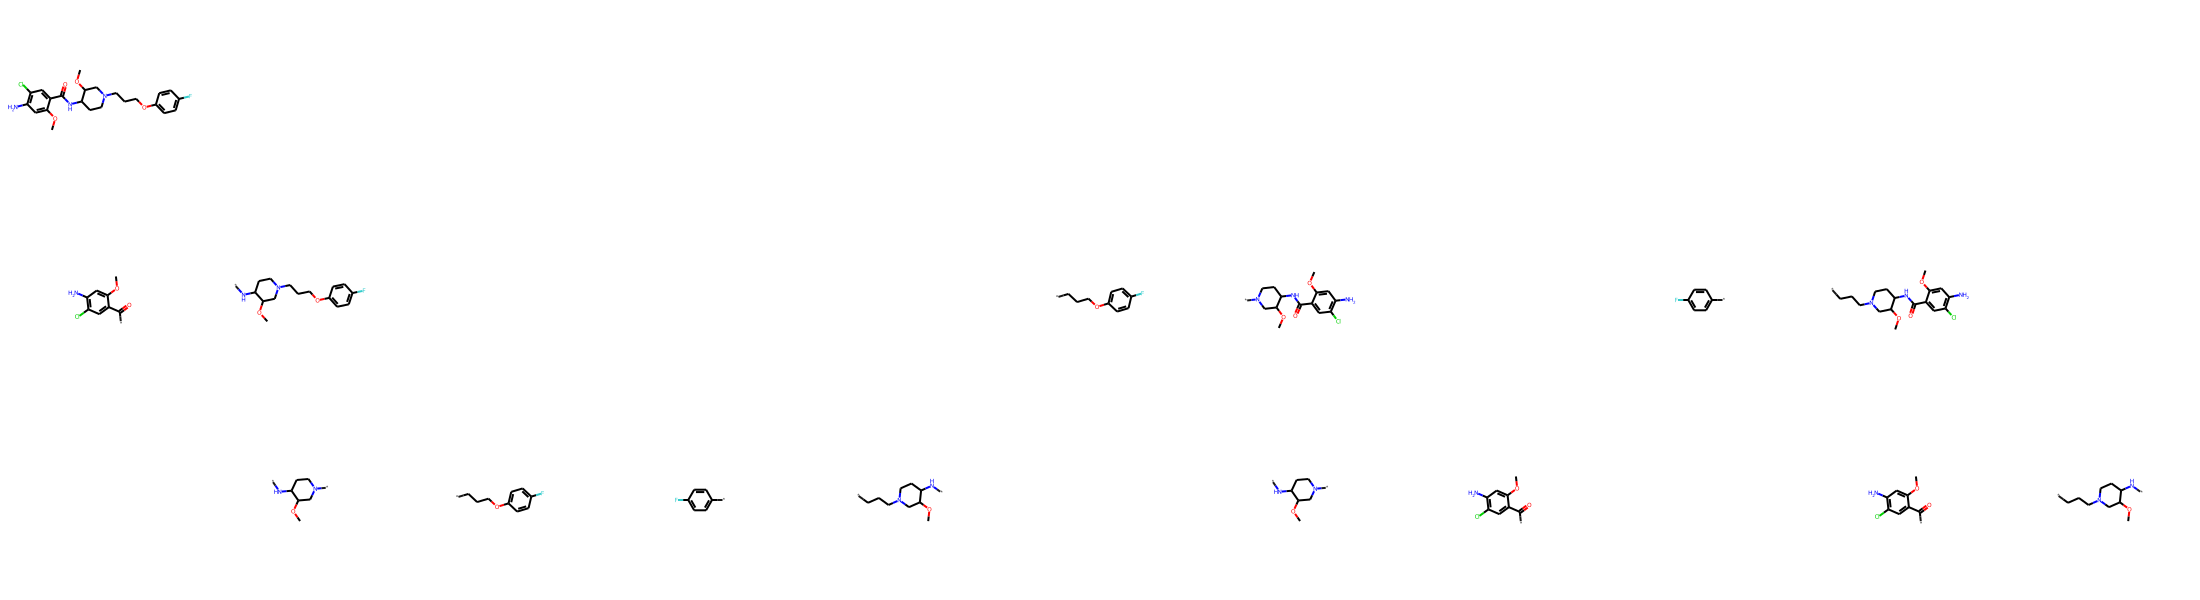

In [11]:
molecule_recap_tree("Clc1cc(c(OC)cc1N)C(=O)NC3CCN(CCCOc2ccc(F)cc2)CC3OC")